# Default parametrelerle denenen modellerin hyper parametre tuningi ile tekrar sonuçlarının kontrol edilmesi

## Kütüphanelerin import edilmesi

In [1]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

from tensorflow.keras.utils import to_categorical

## GridSearch İşlemi Uygulanacak Makine Öğrenimi Modellerinin Tanımlanması

### KNN Grid Search Uygulanması ve optimum parametrelerin bulunması

In [2]:
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.36, random_state=14)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',
                    return_train_score=False, verbose=1)


grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)
n_neighbors = grid_search.best_params_['n_neighbors']

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 3}


In [3]:
accuracy = grid_search.best_score_ *100
print("Parametre tuningi sonucu çıkan optimum başarım : {:.2f}%".format(accuracy) )

Parametre tuningi sonucu çıkan optimum başarım : 98.14%


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Bu parametrenin test seti üzerindeki başarısı : {:.2f}%".format(test_accuracy) )

Bu parametrenin test seti üzerindeki başarısı : 98.12%


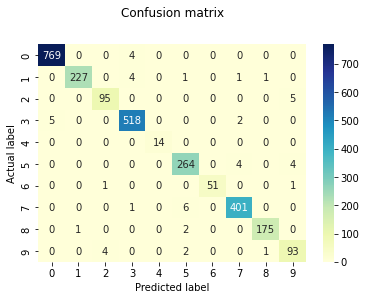

<Figure size 432x288 with 0 Axes>

In [5]:
cm = confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(pd.DataFrame(cm),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()
plt.clf()


### Decision Tree GridSearch Uygulanması ve optimum parametrelerin bulunması

In [6]:
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.36, random_state=14)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

decision_tree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [
    4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]}

grid = GridSearchCV(decision_tree, param_grid, cv=10, scoring='accuracy',
                    return_train_score=False, verbose=1)


grid_search = grid.fit(X_train, y_train)

print(grid_search.best_params_)
criterion = grid_search.best_params_['criterion']
max_depth = grid_search.best_params_['max_depth']

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 15}


In [7]:
accuracy = grid_search.best_score_ *100
print("Parametre tuningi sonucu çıkan optimum başarım : {:.2f}%".format(accuracy) )

Parametre tuningi sonucu çıkan optimum başarım : 97.71%


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)

decision_tree.fit(X_train, y_train)

y_pred=decision_tree.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Bu parametrenin test seti üzerindeki başarısı : {:.2f}%".format(test_accuracy) )

Bu parametrenin test seti üzerindeki başarısı : 98.12%


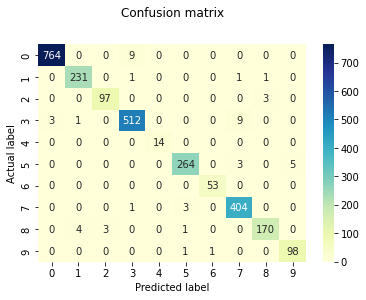

<Figure size 432x288 with 0 Axes>

In [9]:
cm = confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(pd.DataFrame(cm),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()
plt.clf()